In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

## Section 1: Data Overview

In [3]:
# Read in dataset
df = pd.read_csv("../Data/Bankchurners.csv")

# Display Data Types
display(df.dtypes)

# Display Missing Values Count
display(df.isnull().sum())


CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [45]:
# Statistical Summary for Numerical Columns
df_summary = df.describe()

# Check for Duplicate Rows
df_duplicates = df.duplicated().sum()

# Display the statistical summary and number of duplicate rows
print("\nStatistical Summary:")
display(df_summary)

print("\nNumber of Duplicate Rows:")
display(df_duplicates)


Statistical Summary:


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990



Number of Duplicate Rows:


0

#### In section 1, we know that:
1. We get an overview of the data type: there are float numbers, integers, and categorical variables.
2. There's no missing value or duplicate entry.
3. We have the five-number summary and some statistics of numerical variables.

## Section 2: Numerical Variables Analysis

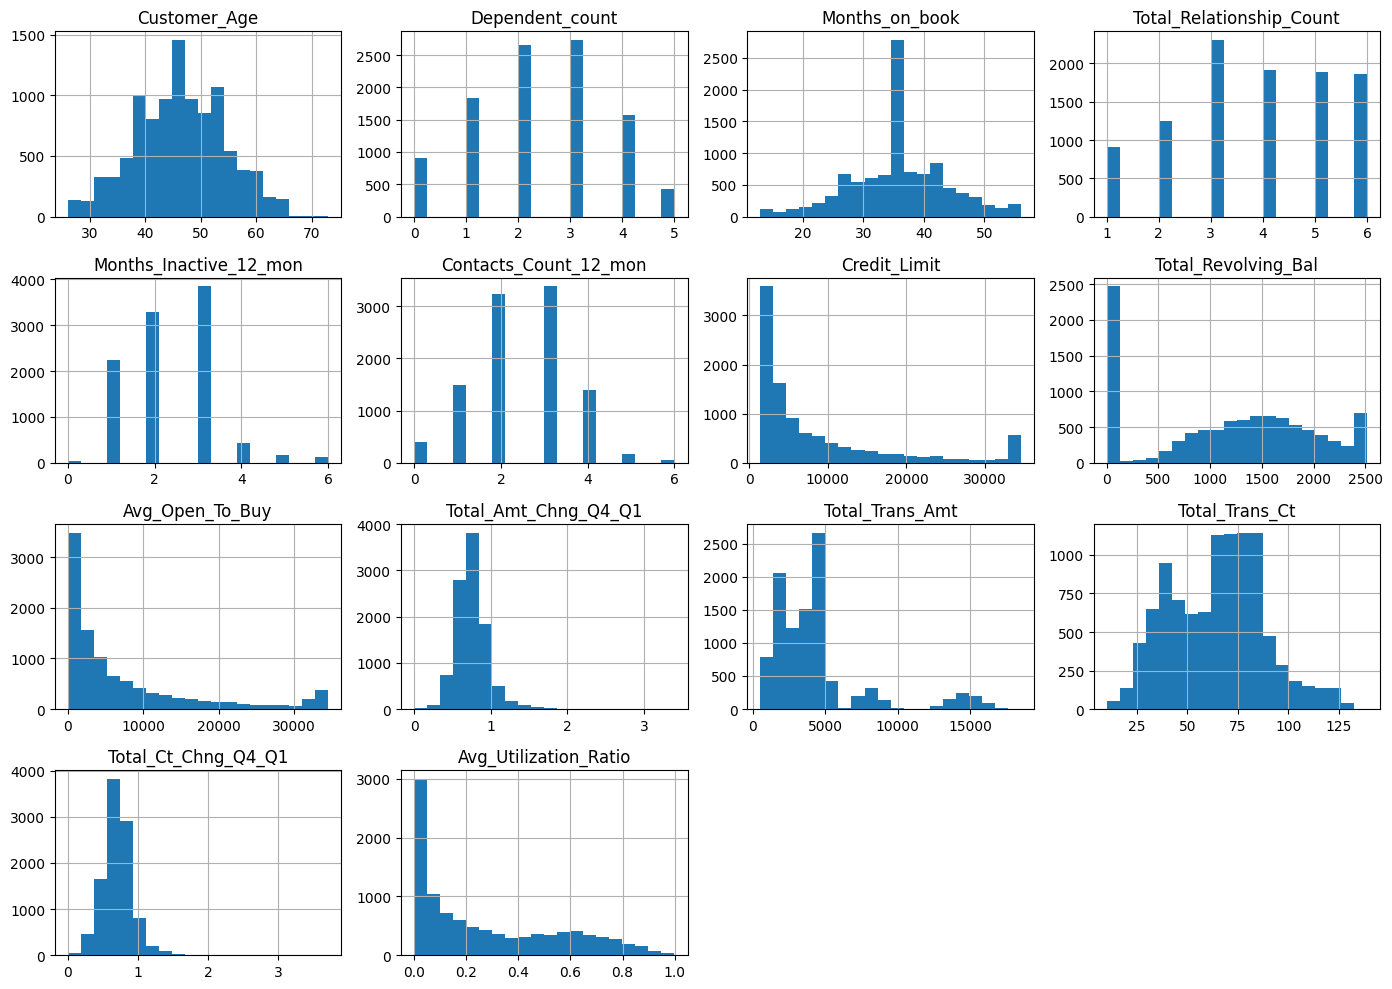

In [46]:
# List of numerical columns in your dataset
numerical_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                     'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                     'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                     'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Plot histograms for each numerical feature
df[numerical_columns].hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()


## Section 3: Categorical Variables Analysis

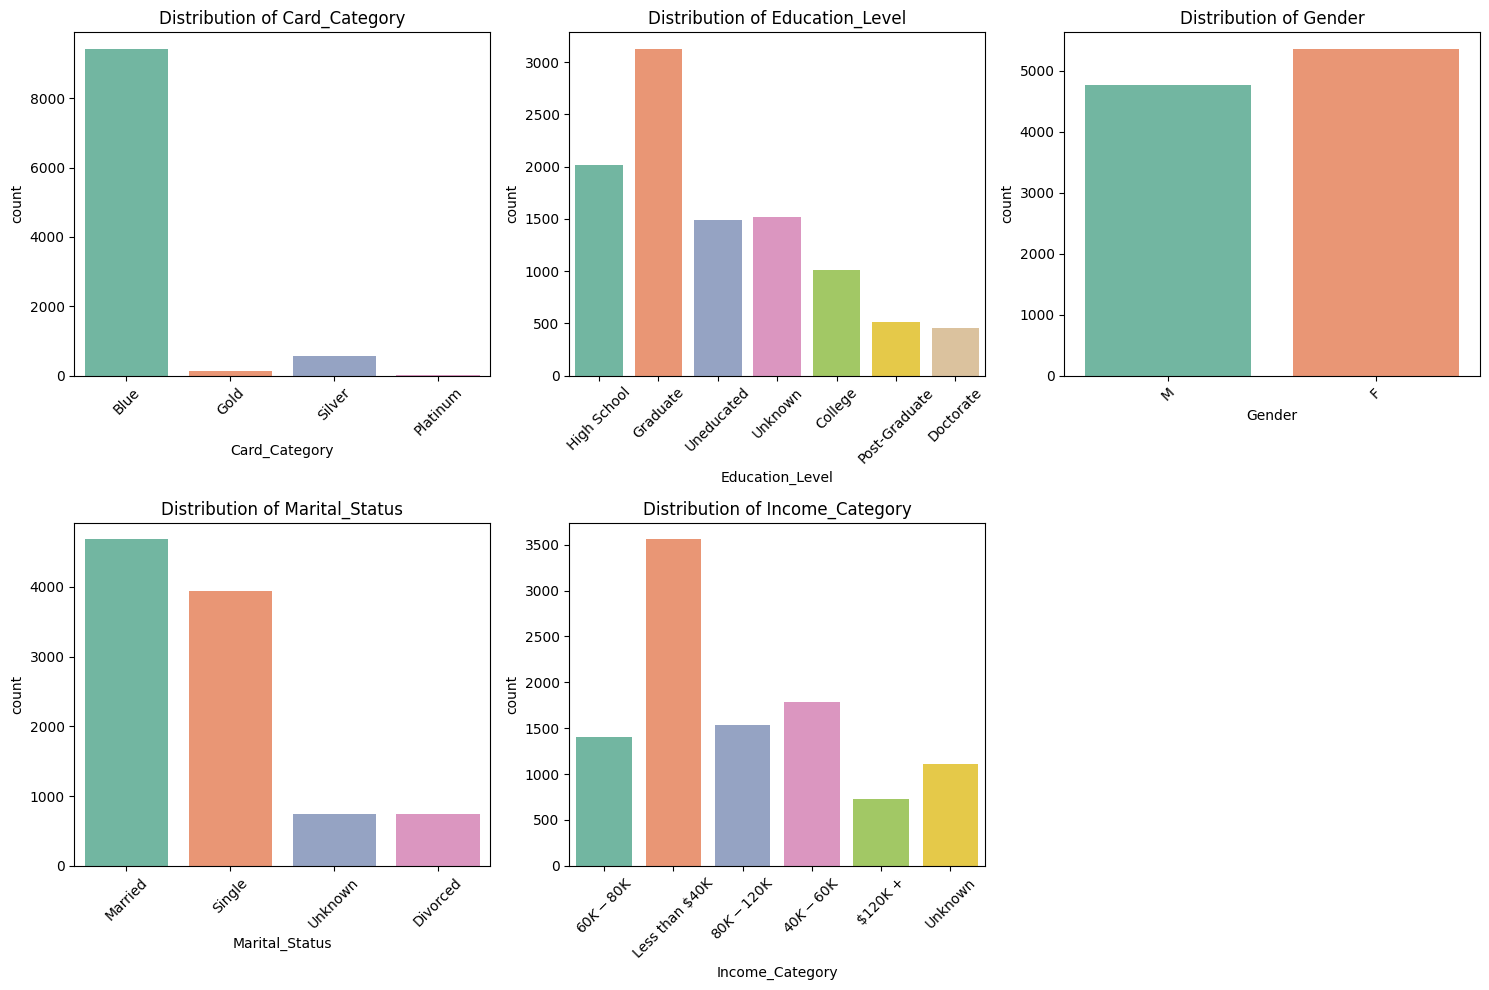

In [49]:
# List of categorical columns to visualize
categorical_columns = ['Card_Category', 'Education_Level', 'Gender', 'Marital_Status', 'Income_Category']

# Create a figure to display all plots
plt.figure(figsize=(15, 10))

# Loop through each categorical column and create a subplot
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Show the plot
plt.show()


#### Summary of Section 2 and Section 3
In these two sections, the overview of each variable is displayed by using histogram and bar chart.

## Section 4: Pearson Coefficient

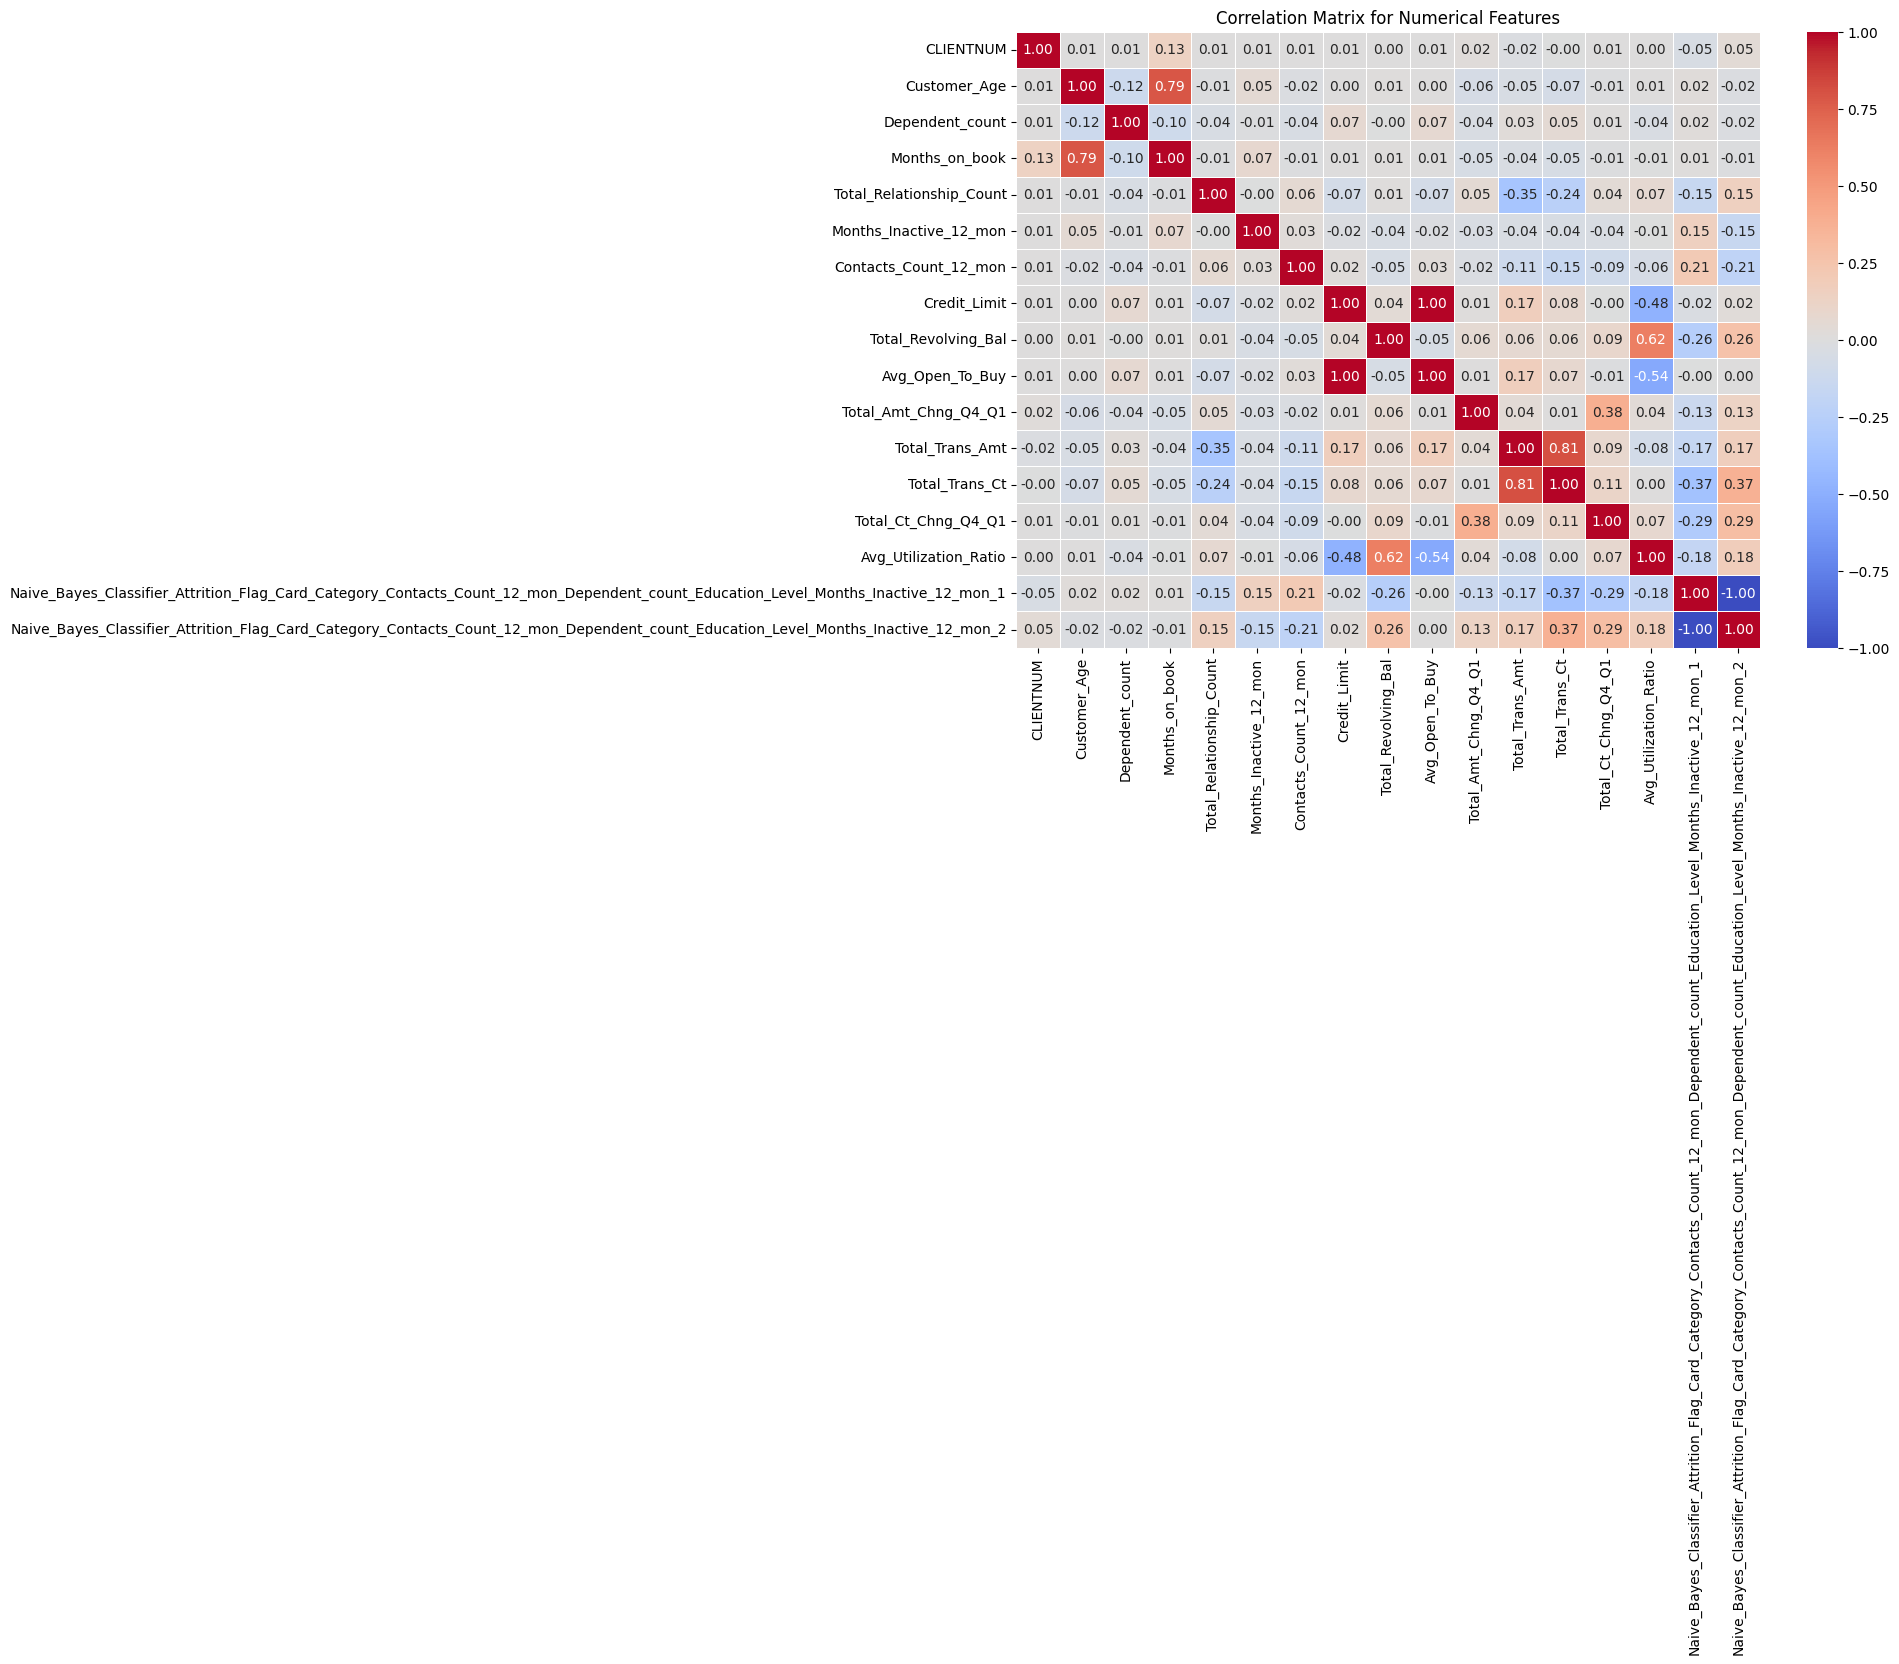

In [50]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

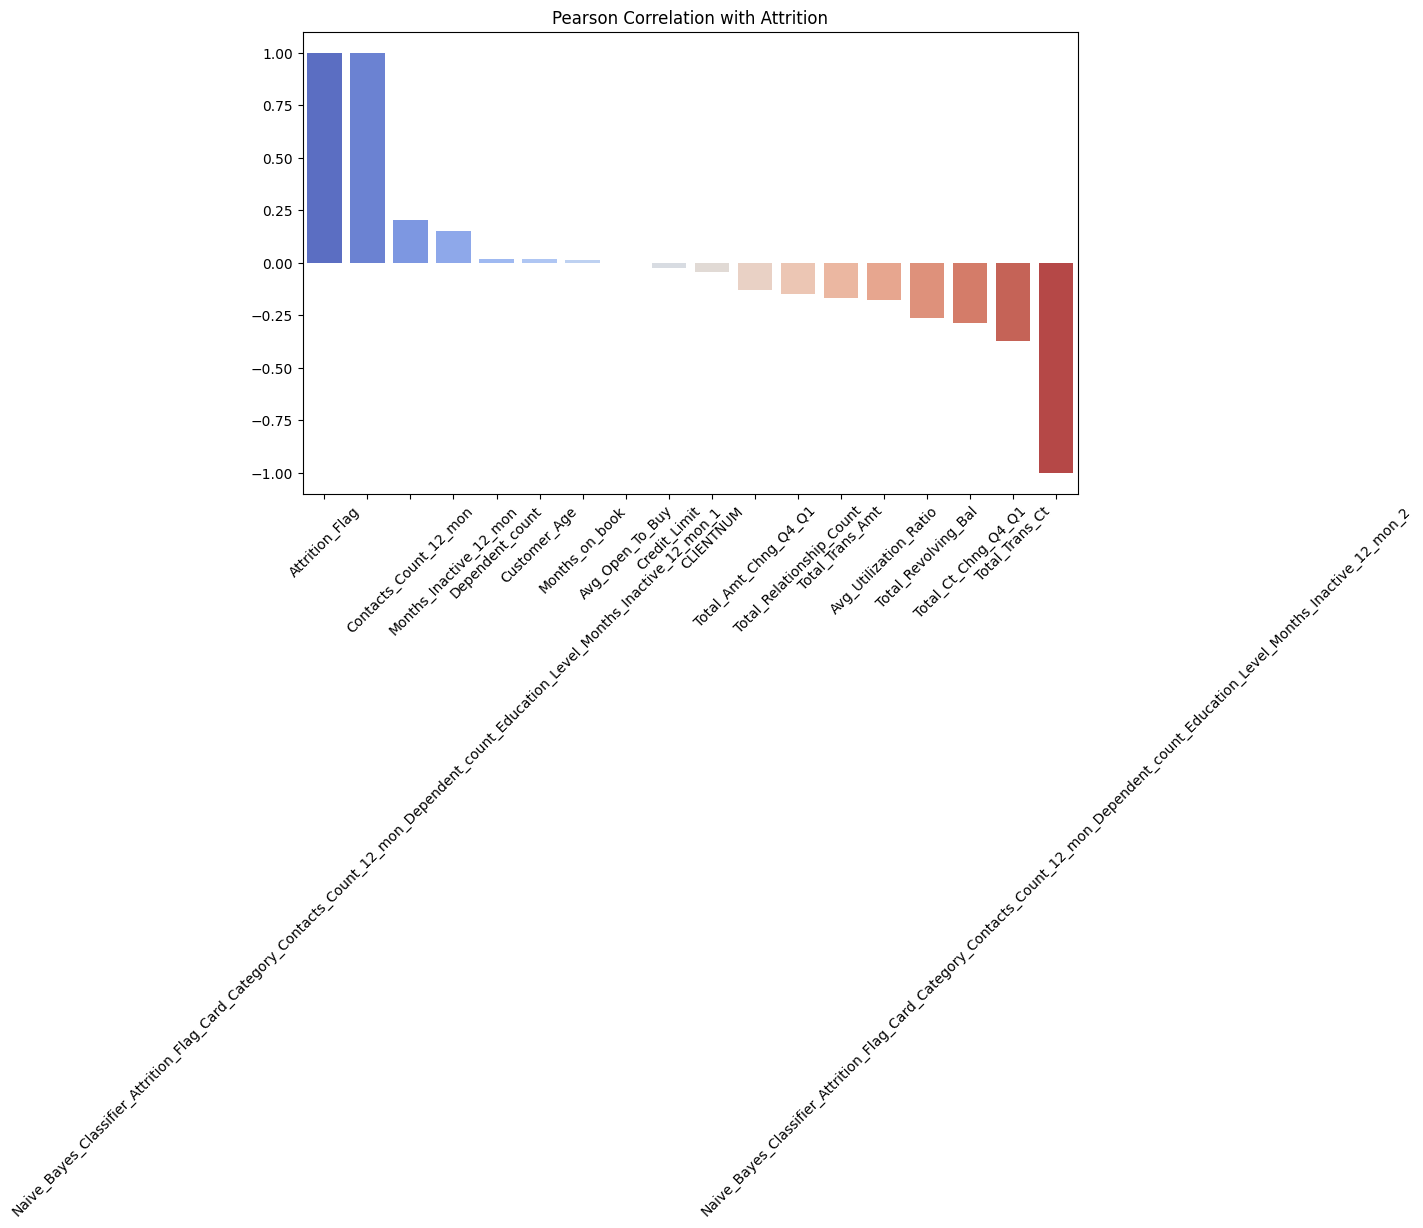

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Attrition_Flag to numeric (assuming it's categorical)
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Compute Pearson correlation
correlations = df.corr()['Attrition_Flag'].sort_values(ascending=False)

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Pearson Correlation with Attrition")
plt.show()
